<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-анализ-данных" data-toc-modified-id="Загрузка-и-анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Изменится-ли-качество-линейной-регрессии,-если-признаки-умножить-на-обратимую-матрицу?-(С-возможностью-переобучения-модели)" data-toc-modified-id="Изменится-ли-качество-линейной-регрессии,-если-признаки-умножить-на-обратимую-матрицу?-(С-возможностью-переобучения-модели)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменится ли качество линейной регрессии, если признаки умножить на обратимую матрицу? (С возможностью переобучения модели)</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных-для-построения-модели" data-toc-modified-id="Подготовка-данных-для-построения-модели-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Подготовка данных для построения модели</a></span></li><li><span><a href="#Перебор-гиперпараметров--моделей" data-toc-modified-id="Перебор-гиперпараметров--моделей-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Перебор гиперпараметров  моделей</a></span></li><li><span><a href="#Реализаця-моделей" data-toc-modified-id="Реализаця-моделей-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Реализаця моделей</a></span><ul class="toc-item"><li><span><a href="#Без-защиты-данных" data-toc-modified-id="Без-защиты-данных-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Без защиты данных</a></span></li><li><span><a href="#Использование-защиты-данных" data-toc-modified-id="Использование-защиты-данных-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Использование защиты данных</a></span></li></ul></li><li><span><a href="#Сравнение-качества-моделей-до-и-после-преобразования" data-toc-modified-id="Сравнение-качества-моделей-до-и-после-преобразования-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Сравнение качества моделей до и после преобразования</a></span></li><li><span><a href="#Анализ-модели" data-toc-modified-id="Анализ-модели-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Анализ модели</a></span></li></ul></li><li><span><a href="#Отчет-по-исследованию" data-toc-modified-id="Отчет-по-исследованию-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Отчет по исследованию</a></span></li></ul></div>

# Защита персональных данных клиентов

Для обеспечения безопасности данных клиентов страховой компании необходимо разработать метод преобразования данных, который обеспечит защиту персональной информации. Этот метод должен быть сложным для восстановления и не должен негативно влиять на качество моделей машинного обучения. Подбирать наилучшую модель не требуется.

# План по выполнению проекта

1. Загрузка и анализ данных
2. Ответ на вопрос и обоснование решения:
   - Изменится ли качество линейной регрессии, если признаки умножить на обратимую матрицу? (С возможностью переобучения модели)
3. Разработка алгоритма преобразования данных для решения задачи
4. Реализация алгоритма с использованием матричных операций и проверка качества линейной регрессии до и после преобразования
5. Отчет по исследованию

# Описание данных

- Набор данных /datasets/insurance.csv
- **Признаки:** пол, возраст и зарплата застрахованного, количество членов его семьи.
- **Целевой признак:** количество страховых выплат клиенту за последние 5 лет.

# Импорт библиотек, создание функций

In [1]:
!pip install -q sweetviz
!pip install -q tabulate

In [2]:
import warnings
warnings.filterwarnings('ignore')

#загрузка стандартных библиотек
import pandas as pd 
import numpy as np

#графики
import seaborn as sns
import matplotlib.pyplot as plt

#генерация отчетов с визуализацией для выполнения EDA
import sweetviz as sv

#ML

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# анализ важности признаков
from sklearn.inspection import permutation_importance

In [3]:
# п.1 Информация о данных:
def info(data):
    '''
    1. Вывод информации о данных
    2. Вывод первых пяти строк данных с полным выводом всех столбцов
    '''
    data.info()
    pd.set_option('display.max_columns', None)
    display(data.head())
    pass

In [4]:
# п.4 Диаграмма предсказаний и целевой переменной:

def plot_predictions(y_pred):
    '''
    Строит диаграмму рассеяния прогнозируемых значений в зависимости от целевой переменной вместе с идеальной линией.
    Параметры: y_pred (в виде массива): прогнозируемые значения.
    '''
    fig, ax = plt.subplots(figsize=(15, 5))
    
    ax.scatter(y_test, y_pred, color='blue', label='Предсказания')
    ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Идеальные значения')
    
    ax.set_xlabel('Целевая переменная')
    ax.set_ylabel('Предсказания')
    ax.set_title('Диаграмма предсказаний и целевой переменной')
    ax.legend()
    
    plt.show()

## Загрузка и анализ данных

In [5]:
link = '/datasets/insurance.csv'

while True:
    try:
        insurance = pd.read_csv(link) 
        break
    except ValueError:
        print('Cсылка на insurance не действительна')

In [6]:
data_info(insurance)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


                                             |          | [  0%]   00:00 -> (? left)


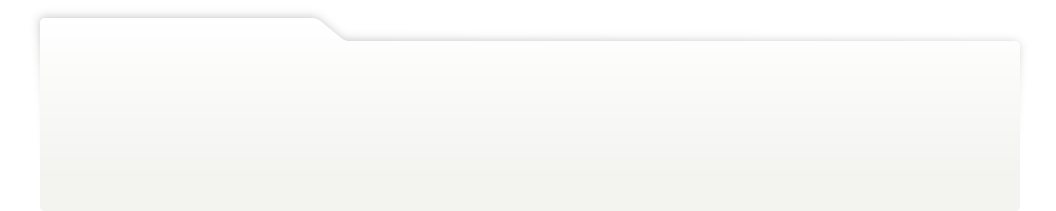
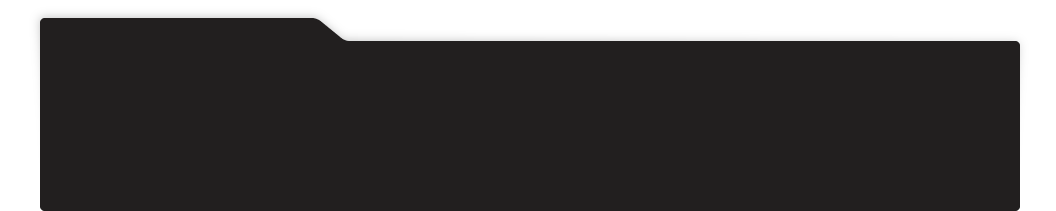
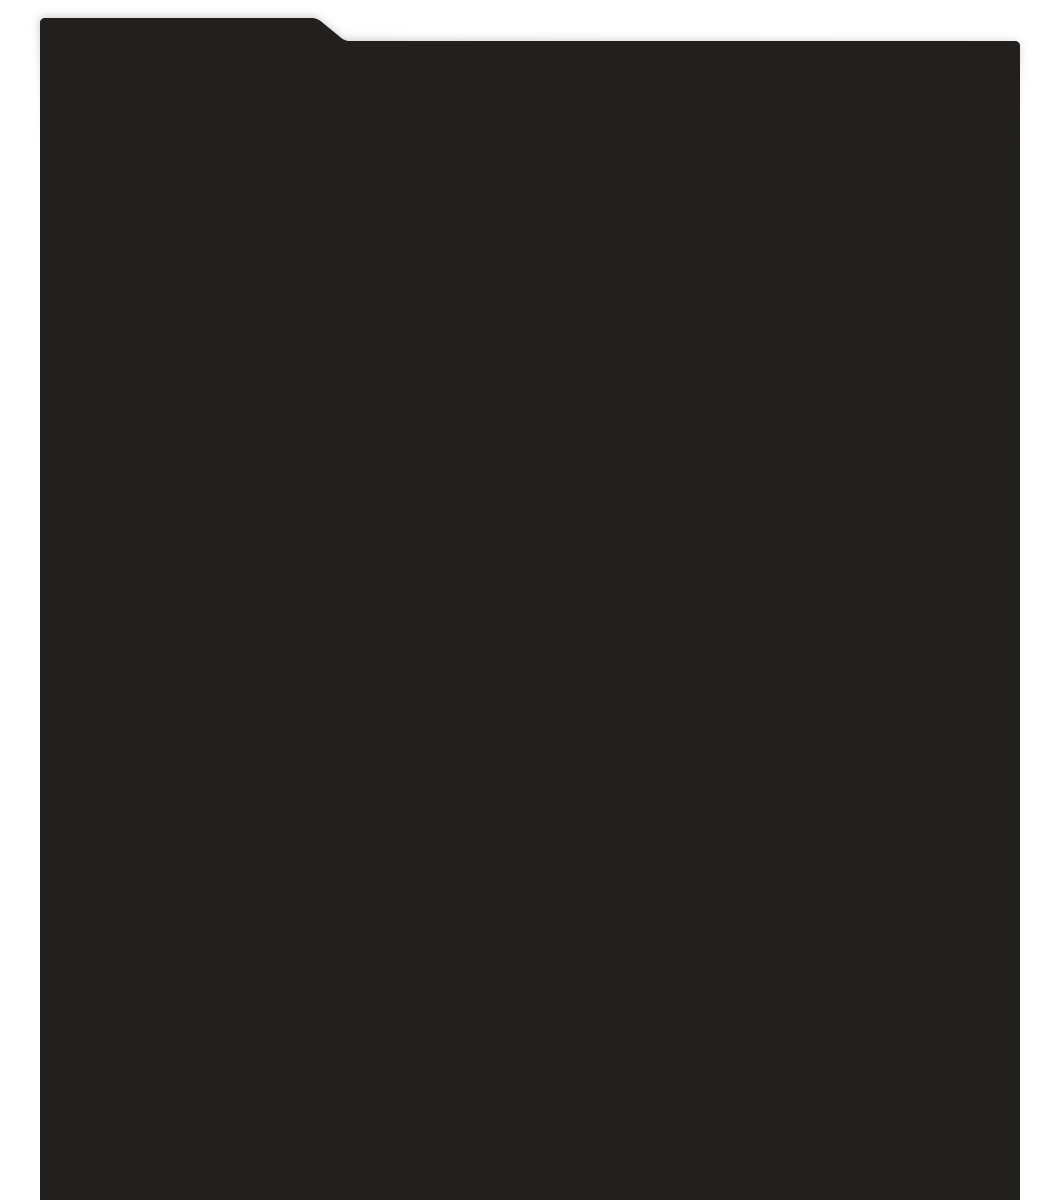
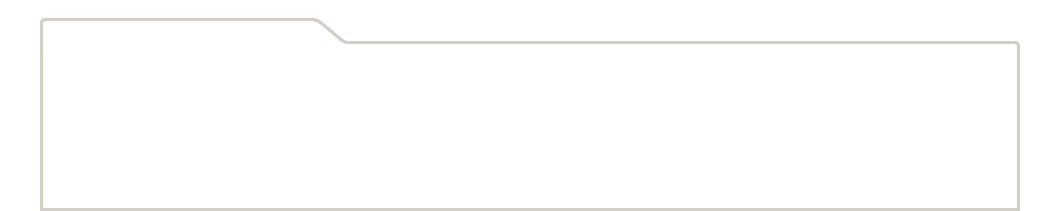
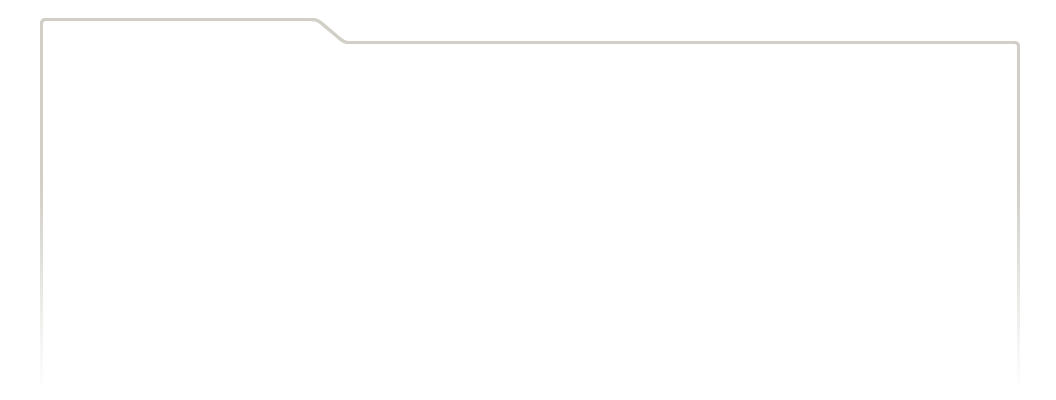
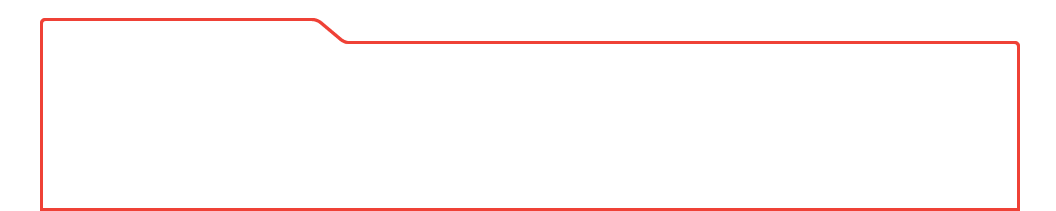
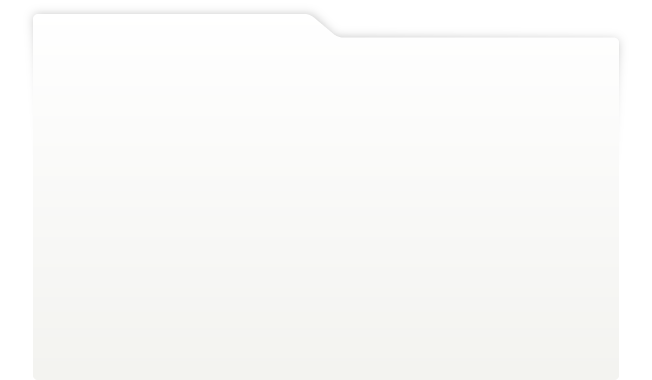
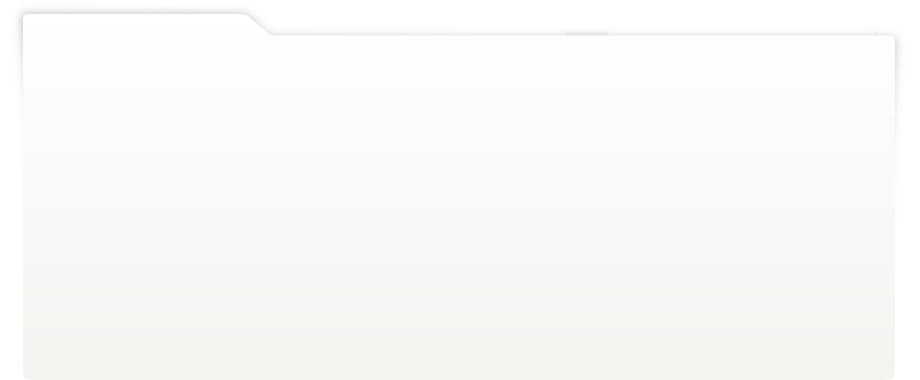
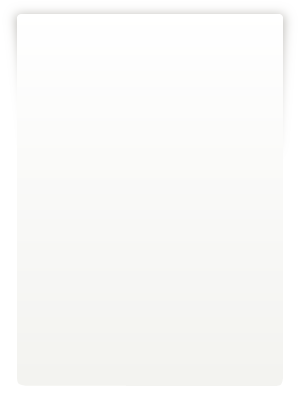
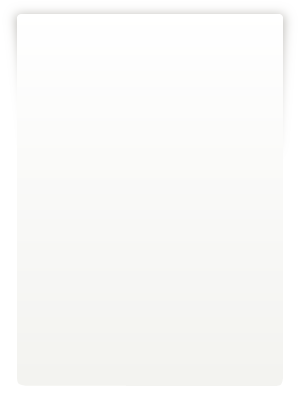
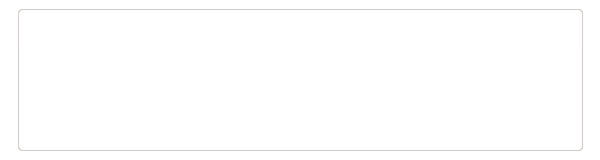
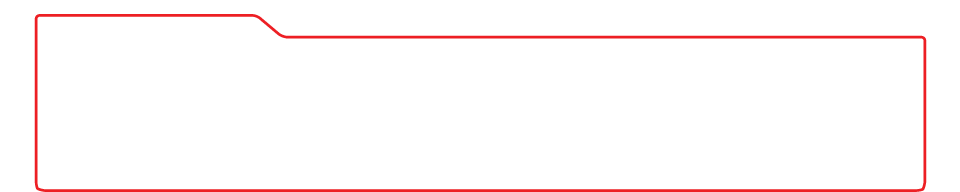
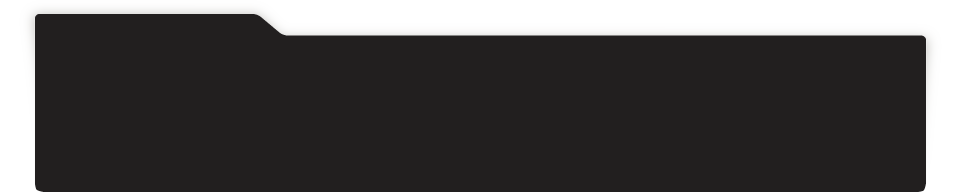
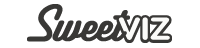
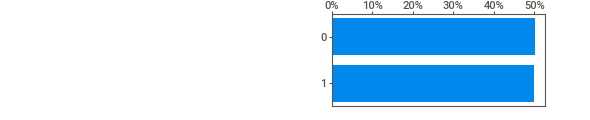
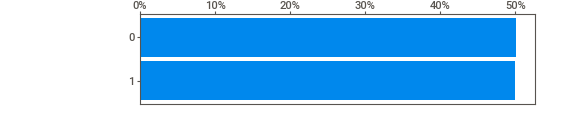
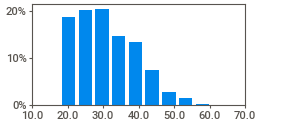
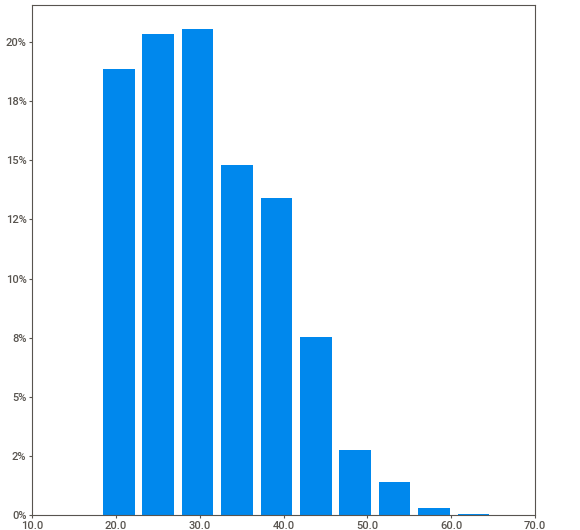
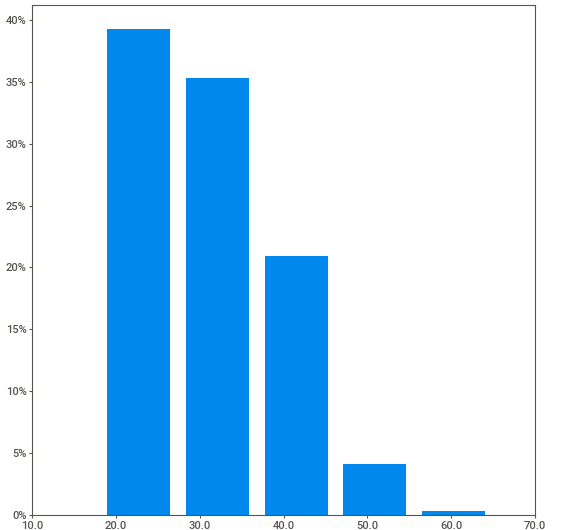
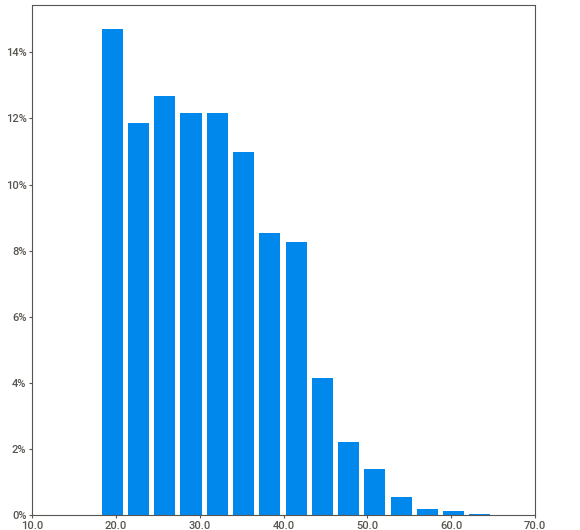
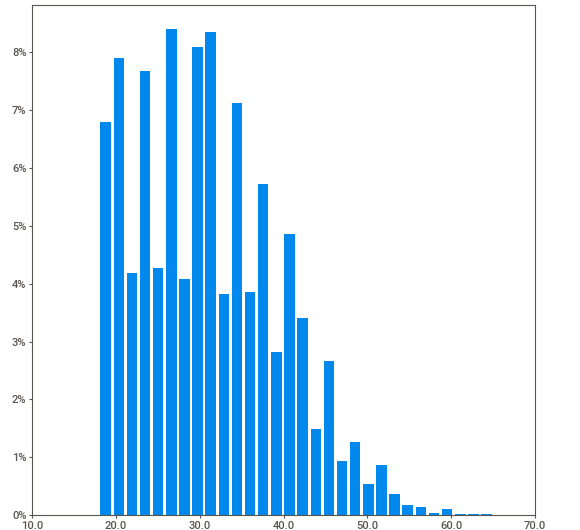
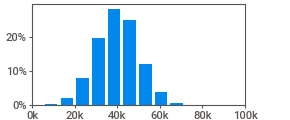
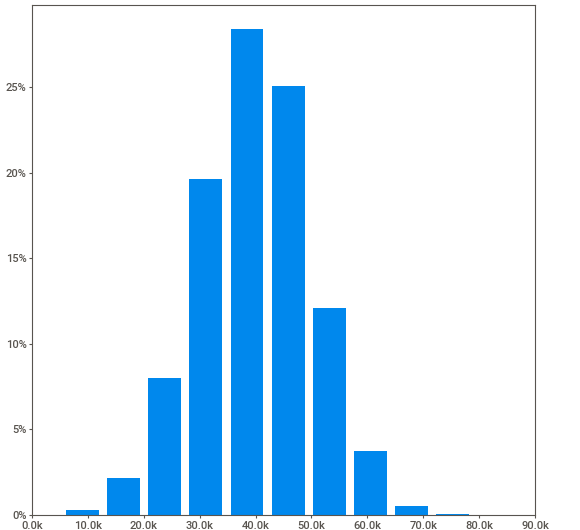
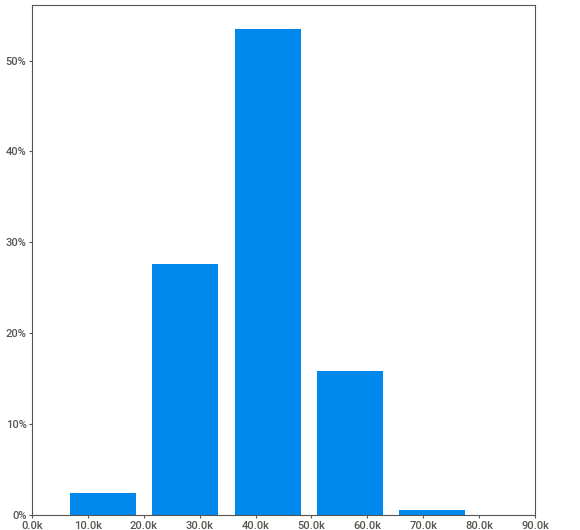
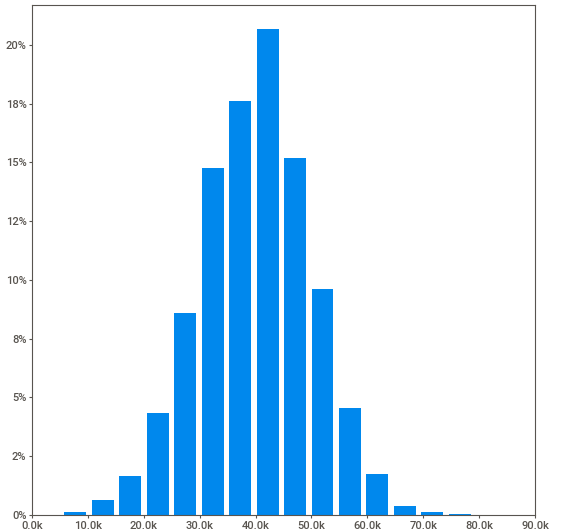
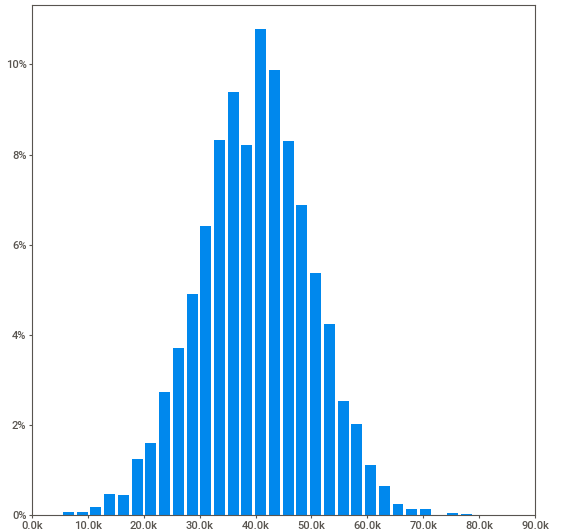
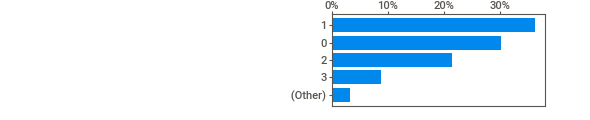
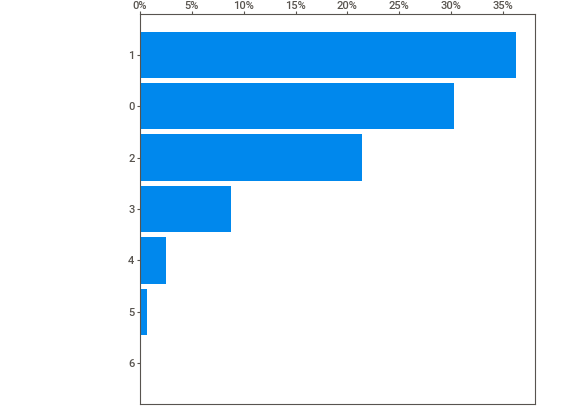
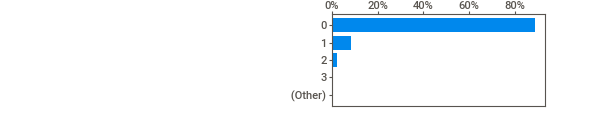
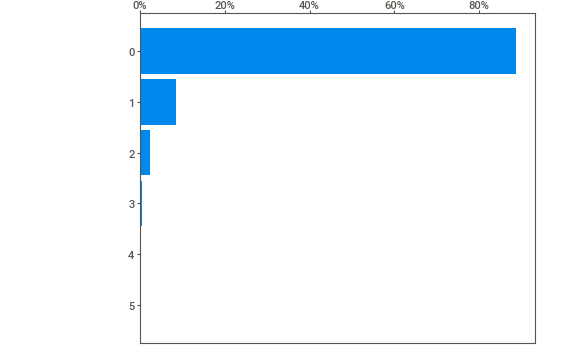
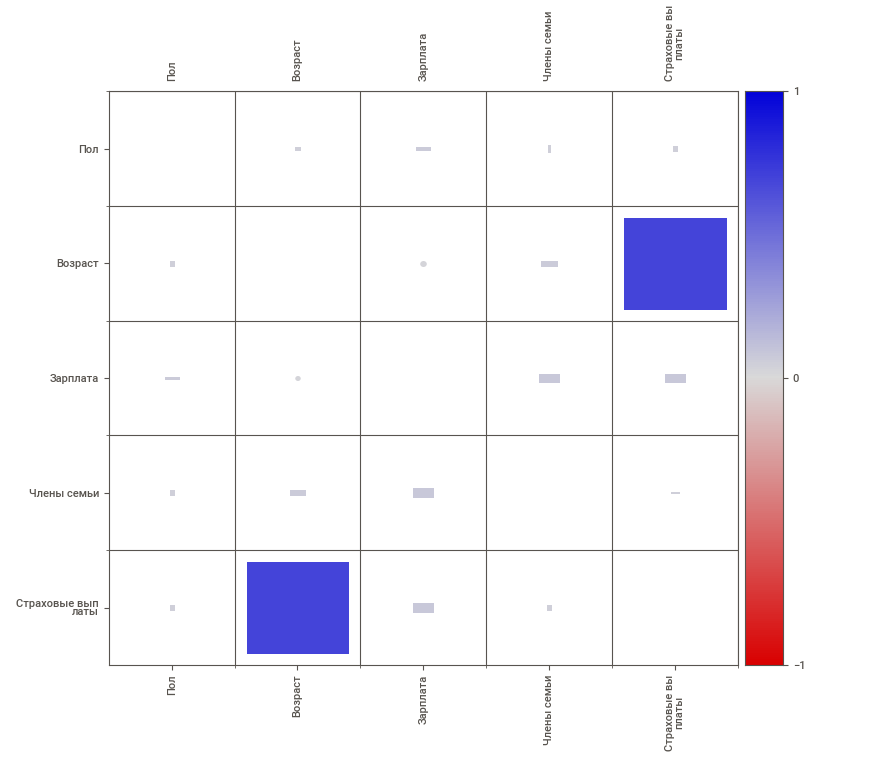
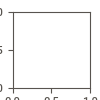

In [7]:
my_report = sv.analyze(insurance)
my_report.show_notebook(scale=0.8)

Предобработка данных:
- Присутствуют дубликаты в данных - скорее всего, это совпадающие данные, их необходимо удалить.
- Названия признаков описаны на русском языке. Переведу названия признаков на английский язык в соответствии с рекомендациями PEP 8.
- Неверный тип данных в столбцах "Возраст" и "Зарплата": заменю тип данных float на integer. Столбец "Пол" переведу в тип данных bool.

Анализ данных:
- Соотношение пола клиентов в выборке равномерное (1:1).
- Возраст клиентов варьируется от 18 до 65 лет. Медианный возраст составляет 30 лет, а средний - 31 год.
- Зарплата клиентов варьируется от 5.3 тыс.ед. до 79 тыс.ед. Медианное значение зарплаты составляет 40.2 тыс.ед., а среднее - 39.9 тыс.ед.
- Количество членов семьи варьируется от 0 до 6 человек. В основном, это один человек (36% от общего числа), у 30% клиентов отсутствуют члены семьи, а у 21% - два человека. Доля клиентов с количеством членов семьи 5 и 6 составляет менее 1%.
- Для 89% клиентов в выборке отсутствуют страховые выплаты за последние 5 лет. Одну выплату получили 8% клиентов, а две выплаты - 2%. Трое и более выплат получили менее 1% клиентов.
- Количество страховых выплат коррелирует с возрастом клиентов, процент корреляции составляет 67%. Однако этот показатель не является критическим для построения модели машинного обучения. Остальные признаки имеют минимальную корреляцию между собой.

In [8]:
# удаление дубликатов
insurance = insurance.drop_duplicates()

# проверка 
duplicates = insurance.duplicated()

if duplicates.any():
    print("Датасет содержит дубликаты.")
else:
    print("Датасет не содержит дубликатов.")

Датасет не содержит дубликатов.


In [9]:
# словарь с новыми именами для столбцов
new_columns = {
    'Пол': 'gender',
    'Возраст': 'age',
    'Зарплата': 'salary',
    'Члены семьи': 'family_members',
    'Страховые выплаты': 'insurance_claims'
}

# переименование столбцов
insurance = insurance.rename(columns=new_columns)

# проверка
insurance.columns

Index(['gender', 'age', 'salary', 'family_members', 'insurance_claims'], dtype='object')

In [10]:
# изменения типа данных
insurance['age'] = insurance['age'].astype(int)
insurance['salary'] = insurance['salary'].astype(int)
insurance['gender'] = insurance['gender'].astype(bool)

# проверка
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            4847 non-null   bool 
 1   age               4847 non-null   int64
 2   salary            4847 non-null   int64
 3   family_members    4847 non-null   int64
 4   insurance_claims  4847 non-null   int64
dtypes: bool(1), int64(4)
memory usage: 194.1 KB


In [11]:
insurance.head()

,gender,age,salary,family_members,insurance_claims
0,True,41,49600,1,0
1,False,46,38000,1,1
2,False,29,21000,0,0
3,False,21,41700,2,0
4,True,28,26100,0,0


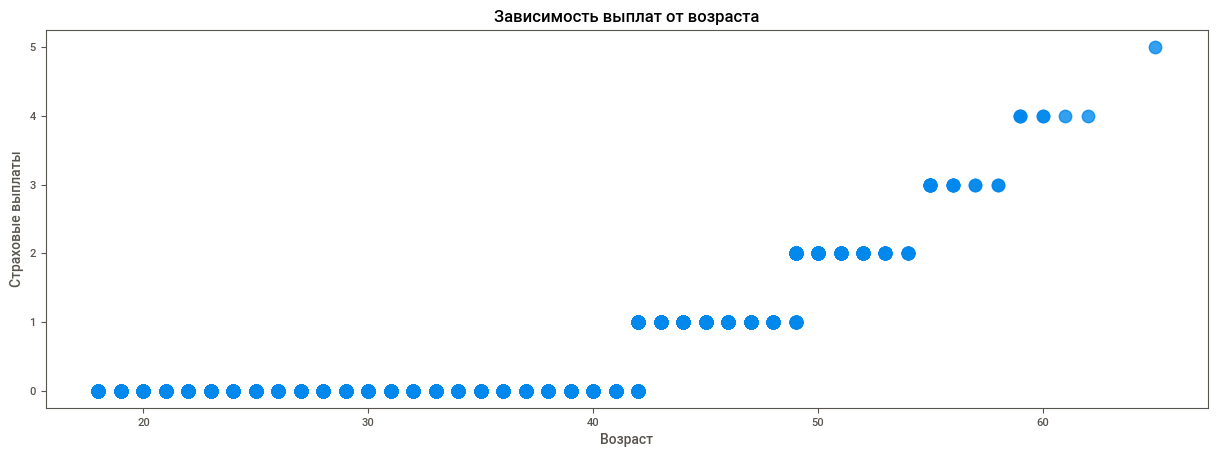

In [12]:
plt.figure(figsize=(15, 5))

# Создание диаграммы рассеяния 
scatter = plt.scatter(insurance['age'], insurance['insurance_claims'], s=80, alpha=0.8)

plt.xlabel('Возраст')
plt.ylabel('Страховые выплаты')
plt.title('Зависимость выплат от возраста')

plt.show()

С возрастом, после 40 лет наблюдается постепенное и стабильное увеличение количества страховых выплат.

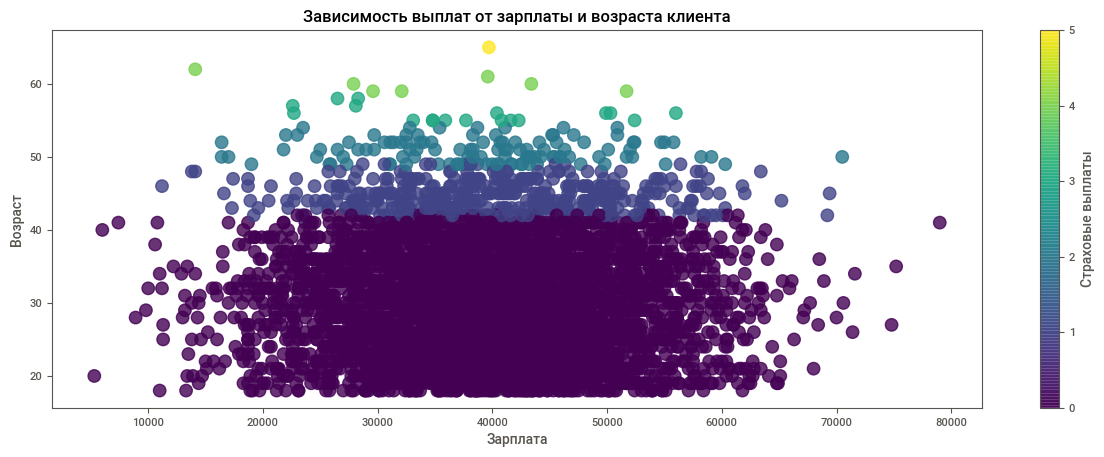

In [13]:
plt.figure(figsize=(15, 5))

# Создание диаграммы рассеяния 
scatter = plt.scatter(insurance['salary'], insurance['age'], c=insurance['insurance_claims'], s=80, alpha=0.8)

plt.xlabel('Зарплата')
plt.ylabel('Возраст')
plt.title('Зависимость выплат от зарплаты и возраста клиента')

plt.colorbar(scatter, label='Страховые выплаты')
plt.show()

С повышением возраста клиента и приближением его зарплаты к медианному значению в 40 тыс.ед., вероятность увеличения количества страховых выплат становится выше.

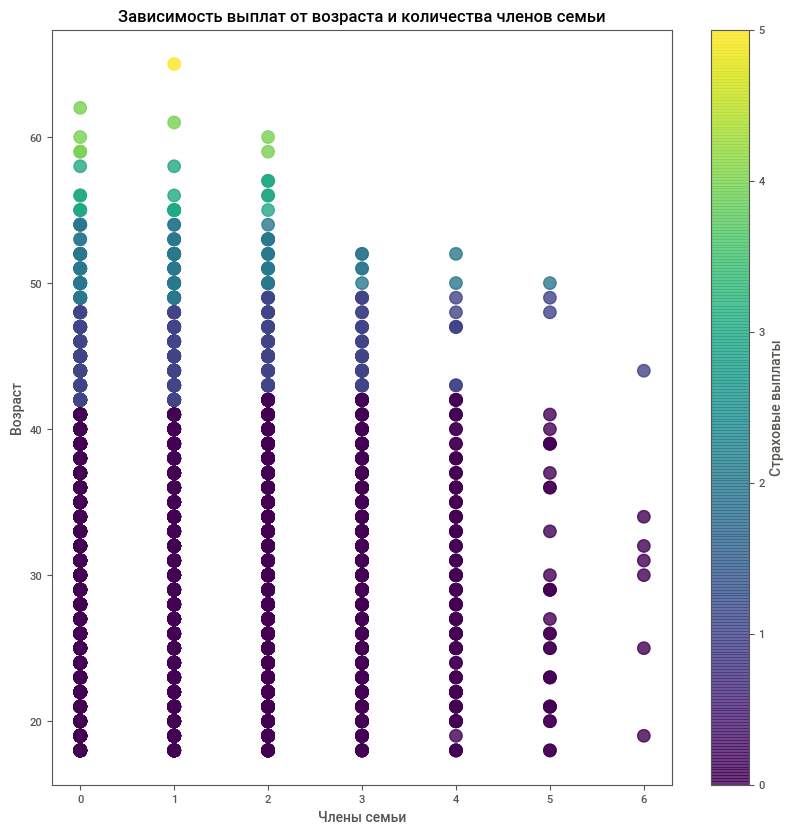

In [14]:
plt.figure(figsize=(10, 10))

# Создание диаграммы рассеяния с изменением цвета точек в зависимости от количества стаховых выплат
scatter = plt.scatter(insurance['family_members'], insurance['age'], c=insurance['insurance_claims'],  s=80, alpha=0.8)

plt.xlabel('Члены семьи')
plt.ylabel('Возраст')
plt.title('Зависимость выплат от возраста и количества членов семьи')

plt.colorbar(scatter, label='Страховые выплаты')
plt.show()

In [15]:
# Отфильтровать данные для людей старше 40 лет
filtered_data = insurance[insurance['age'] >= 40]

# Определить диапазоны для возраста
age_bins = [40, 45, 50, 55, 60, 65]

filtered_data['age_range'] = pd.cut(filtered_data['age'], bins=age_bins).astype(str)
pivot_table = pd.pivot_table(filtered_data, values='family_members', index='age_range', columns='insurance_claims', aggfunc='mean')

print(pivot_table)

insurance_claims         0         1         2         3    4    5
age_range                                                         
(40, 45]          1.434783  1.050000       NaN       NaN  NaN  NaN
(45, 50]               NaN  1.314685  0.924528       NaN  NaN  NaN
(50, 55]               NaN       NaN  1.098361  0.777778  NaN  NaN
(55, 60]               NaN       NaN       NaN  1.111111  0.8  NaN
(60, 65]               NaN       NaN       NaN       NaN  0.5  1.0


По результатам анализа таблицы и диаграммы можно сделать предположение о наличии связи между увеличением числа членов семьи и снижением обращений за страховыми выплатами. Однако, ввиду несбалансированности данных по этим показателям, нельзя сделать однозначные выводы.

### Вывод

В ходе предобработки данных были выполнены следующие операции:
- Удалены дубликаты в данных.
- Переведены названия признаков на английский язык согласно рекомендациям PEP 8.
- Изменены типы данных столбцов "Возраст" и "Зарплата" с float на integer. Столбец "Пол" был переведен в тип данных bool.

В результате анализа данных были получены следующие выводы:
- Соотношение пола клиентов в выборке равномерное (1:1).
- Возраст клиентов варьируется от 18 до 65 лет. Медианный возраст составляет 30 лет, а средний - 31 год.
- Зарплата клиентов варьируется от 5.3 тыс.ед. до 79 тыс.ед. Медианное значение зарплаты составляет 40.2 тыс.ед., а среднее - 39.9 тыс.ед.
- Количество членов семьи варьируется от 0 до 6 человек. В основном, это один человек (36% от общего числа), у 30% клиентов отсутствуют члены семьи, а у 21% - два человека. Доля клиентов с количеством членов семьи 5 и 6 составляет менее 1%.
- Для 89% клиентов в выборке отсутствуют страховые выплаты за последние 5 лет. Одну выплату получили 8% клиентов, а две выплаты - 2%. Трое и более выплат получили менее 1% клиентов.
- Количество страховых выплат коррелирует с возрастом клиентов, процент корреляции составляет 67%. Однако этот показатель не является критическим для построения модели машинного обучения. Остальные признаки имеют минимальную корреляцию между собой.


**С возрастом, после 40 лет наблюдается постепенное и стабильное увеличение количества страховых выплат. Это говорит о том, что с возрастом растет вероятность страховых случаев, требующих выплаты.**

**С повышением возраста клиента и приближением его зарплаты к медианному значению в 40 тыс.ед., вероятность увеличения количества страховых выплат становится выше.**

**Можно предположить наличие связи между увеличением числа членов семьи и снижением обращений за страховыми выплатами. Однако, ввиду несбалансированности данных по этим показателям, нельзя сделать однозначные выводы. Для более точного определения связи необходимы дополнительные исследования и анализ.**

## Умножение матриц

### Изменится ли качество линейной регрессии, если признаки умножить на обратимую матрицу? (С возможностью переобучения модели)

Ответ: Нет, качество линейной регрессии не изменится при умножении признаков на обратимую матрицу.

Обоснование:

В линейной регрессии модель предсказывает целевую переменную $y$ на основе признаков $X$ с использованием весов $w$. Предсказания модели обозначаются как $a$. Формула для предсказаний в линейной регрессии выглядит следующим образом:
$$
a = Xw
$$
Изначально веса w вычисляются с помощью метода наименьших квадратов:
$$
w = (X^T X)^{-1} X^T y
$$
Если мы умножим матрицу признаков X на обратимую матрицу A, новая матрица признаков будет выглядеть следующим образом:
$$
X' = XA
$$
Тогда новые предсказания модели будут:
$$
a' = X'w' = (XA)w'
$$
Однако, веса w' для новой модели могут быть вычислены следующим образом:
$$
w' = ((X')^T X')^{-1} (X')^T y
$$
Подставим значение $X' = XA$:
$$
w' = ((XA)^T XA)^{-1} (XA)^T y
$$
Раскроем скобки и воспользуемся свойством транспонированного произведения матриц $$(AB)^T = B^T A^T:$$
$$
w' = (A^T X^T X A)^{-1} A^T X^T y
$$
Теперь воспользуемся свойством обратной матрицы и переставим множители внутри скобок:
$$
w' = A^{-1} (X^T X)^{-1} (A^T)^{-1} A^T X^T y
$$
Заметим, что умножение обратной матрицы на исходную матрицу дает единичную матрицу: $A^{-1} A = E$, где $E$ - единичная матрица.

Получаем:
$$
w' = A^{-1} (X^T X)^{-1} X^T y = A^{-1} w
$$
Теперь сравним новые предсказания $a'$ с исходными предсказаниями $a$:
$$
a' = X'w' = XAA^{-1} (X^T X)^{-1} X^T y
$$
$$
a' = XAA^{-1} w = Xw = a
$$
Таким образом, мы видим, что новые предсказания $a'$ равны исходным предсказаниям $a$. Поскольку качество модели зависит только от соответствия предсказаний и истинных значений целевой переменной, а они не изменяются, то и качество модели не изменится при умножении признаков на обратимую матрицу.

## Алгоритм преобразования

**Алгоритм**

Для преобразования данных и решения задачи линейной регрессии можно использовать следующий алгоритм:

1. Загрузить данные и разделить их на матрицу признаков $X$ и вектор целевой переменной $y$.
2. Оценить модель линейной регрессии на исходных данных, получив оптимальные веса $w$ и смещение $b$.
3. Сгенерировать случайную обратимую матрицу $A$ размером $(m x m)$, где - $m$ - количество признаков. Это можно сделать с использованием библиотеки NumPy следующим образом:

```
A = np.random.rand(m, m)
A_inv = np.linalg.inv(A)

```

4. Умножить матрицу признаков $X$ на обратимую матрицу $A$, получив новую матрицу признаков $X' = X.dot(A)$.
5. Обучить модель линейной регрессии на преобразованных признаках $X'$ и целевой переменной $y$, получив новые оптимальные веса $w'$ и смещение $b'$.
6. Оценить качество модели линейной регрессии на преобразованных данных, используя метрику R2

**Обоснование:**

Для доказательства, что предсказания линейной регрессии не изменятся при умножении признаков на обратимую матрицу, рассмотрим выражение для предсказаний $a$:

$$
a = Xw.
$$

Теперь рассмотрим новые предсказания $a'$ после умножения матрицы признаков на обратимую матрицу $A$:

$$
a' = X'w',
$$

где $X' = XA$ и $w'$ - новые веса.

Подставим выражение для $X'$:

$$
a' = XA w'.
$$

Теперь воспользуемся связью между исходными весами $w$ и новыми весами $w'$ аналогично предыдущему доказательству:

$$
w' = A^{-1}w.
$$

Подставим это выражение в предыдущее:

$$
a' = XA (A^{-1}w).
$$

Применяем ассоциативность умножения матриц:

$$
a' = X(Ew) = Xw = a,
$$
где $E$ - единичная матрица.


Таким образом, мы получили, что $a = a'$. Это значит, что предсказания линейной регрессии не изменятся при умножении признаков на обратимую матрицу.

## Проверка алгоритма

### Подготовка данных для построения модели

In [16]:
X = insurance[['gender', 'age', 'salary', 'family_members']]
y = insurance['insurance_claims']

In [17]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

In [18]:
# Создаем объект StratifiedKFold с указанием количества фолдов
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=12345)

### Перебор гиперпараметров  моделей

1. Я использую модель LinearRegression: базовая модель линейной регрессии без регуляризации. 

2. Гиперпараметры влияют на поведение модели и могут быть оптимизированы для достижения лучшей производительности. Перебор позволяет исследовать различные комбинации гиперпараметров и найти наилучшие значения для каждой модели. Перебор гиперпараметров происходит с помощью RandomizedSearchCV. Использован StratifiedKFold с указанием количества фолдов (kf) для кросс-валидации модели. StratifiedKFold поддерживает стратификацию данных, что означает сохранение пропорций классов в каждом фолде.

3. Также я использую StandardScaler() для нормализации данных перед подачей их на вход модели линейной регрессии. 

In [19]:
model = LinearRegression()
pipeline = Pipeline([('scaler', StandardScaler()), ('regressor', model)])

In [20]:
# Определяем гиперпараметры для перебора
params = {
    'regressor__normalize': [True, False],
    'regressor__fit_intercept': [True, False],
    'regressor__copy_X': [True, False],
    'regressor__n_jobs': [-1, 1, 2, 3, 4]
}

# RandomizedSearchCV для перебора гиперпараметров
random_search = RandomizedSearchCV(pipeline, param_distributions=params, n_iter=1000, cv=kf, random_state=12345, scoring='r2')


random_search.fit(X_train, y_train)

y_pred = random_search.predict(X_test)

score = r2_score(y_test, y_pred)

# Выводим лучшие параметры, модель и результаты перебора
best_params = random_search.best_params_

print("Лучшие параметры:", best_params)
print("Лучший результат (R2):", score)

Лучшие параметры: {'regressor__normalize': True, 'regressor__n_jobs': -1, 'regressor__fit_intercept': True, 'regressor__copy_X': True}
Лучший результат (R2): 0.4230772761583671


### Реализаця моделей

#### Без защиты данных

In [21]:
# пустой список для хранения оценок
scores = []

model = LinearRegression(normalize=True, n_jobs=-1, fit_intercept= True, copy_X = True)

# Цикл по разбиению данных на фолды
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    score = r2_score(y_test, y_pred)
    scores.append(score)

# Вычисление средней R2-оценки по всем фолдам
mean_score = np.mean(scores)

print("Mean R2 score:", mean_score)

Mean R2 score: 0.42930932095736213


In [ ]:
    {
        'model': [Ridge(random_state=12345)],
        'model__alpha': [0.1, 0.5, 1.0],
        'model__solver': ['auto', 'svd', 'cholesky'],
        'model__max_iter': [100, 200, 300]
    },

    {
        'model': [LGBMRegressor(random_state=12345)],
        'model__n_estimators': [50, 100, 150],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [4, 6, 8]
    },
    
    {
        'model': [CatBoostRegressor(random_state=12345)],
        'model__iterations': [80, 120, 160],
        'model__learning_rate': [0.01, 0.05, 0.1],
        'model__depth': [2, 4, 6]
    }
]

#### Использование защиты данных 

In [22]:
np.random.seed(12345)

# Получение количества признаков в матрице X
n_features = X.values.shape[1]  

# Создание случайной матрицы заданной размерности
matrix = np.random.rand(n_features, n_features)

# Проверка обратимости матрицы
if np.linalg.det(matrix) != 0:
    reversible_matrix = np.linalg.inv(matrix)
    print("Обратимая матрица:")
    print(reversible_matrix)
else:
    print("Матрица необратима")

Обратимая матрица:
[[ 2.1336149   0.5051926  -1.71113385  1.33832486]
 [-3.76534462 -2.61352053  6.72316006 -6.07193701]
 [ 0.97426298  2.9928115  -3.49875049  1.84220045]
 [ 0.13998298 -0.94454066  0.52375812  1.652661  ]]


In [23]:
# пустой список для хранения оценок
scores = []

# Трансформация матрицы X с помощью обратной матрицы
X_transformed = np.dot(X.values, reversible_matrix)
X_transformed = pd.DataFrame(X_transformed)

for train_index, test_index in kf.split(X_transformed, y):
    X_train, X_test = X_transformed.iloc[train_index], X_transformed.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    pipeline.fit(X_train, y_train)
    y_pred_encrypted = pipeline.predict(X_test)
    score = r2_score(y_test, y_pred_encrypted)
    scores.append(score)


mean_score_encrypted = np.mean(scores)

print("Mean R2 score:", mean_score_encrypted)

Mean R2 score: 0.4293093209573593


### Сравнение качества моделей до и после преобразования

In [24]:
if mean_score_encrypted == mean_score:
    print("mean_score_encrypted и mean_score равны")
else:
    print("mean_score_encrypted и mean_score не равны")
    print('разница между значениями составляет:', 100-mean_score_encrypted/mean_score*100, '%')

mean_score_encrypted и mean_score не равны
разница между значениями составляет: 6.536993168992922e-13 %


Незначительное различие вызвано особенностями преобразования матриц и чисел с плавающей точкой.

Небольшие отклонения в значениях метрик не оказывают существенного влияния на результаты модели и не должны влиять на ее общую оценку или качество.

In [25]:
# Рассчет погрешности (среднеквадратичная ошибка)
mse = mean_squared_error(y_pred_encrypted, y_pred)

# Создание таблицы
data = {'y_test': y_test, 'y_pred_encrypted': y_pred_encrypted, 'y_pred': y_pred}
df = pd.DataFrame(data)

# Добавление столбца с погрешностью
df['error'] = y_pred_encrypted - y_pred

# Вывод таблицы
display(df.head())

print('Сумма разности погрешностей двух моделей:', sum(df['error']))

,y_test,y_pred_encrypted,y_pred,error
16,0,-0.037496,-0.037496,-2.365608e-13
19,0,0.032000,0.032000,1.703776e-13
21,0,0.340719,0.340719,5.345724e-14
23,0,0.205304,0.205304,3.954614e-13
29,0,-0.223957,-0.223957,3.510248e-13


Сумма разности погрешностей двух моделей: 1.4514736634829717e-11


Исходя из вычислений, сумма разности погрешностей является значением близким к нулю. Это говорит о том, что использование шифрования данных не вносит влияния на точность модели.

### Анализ модели

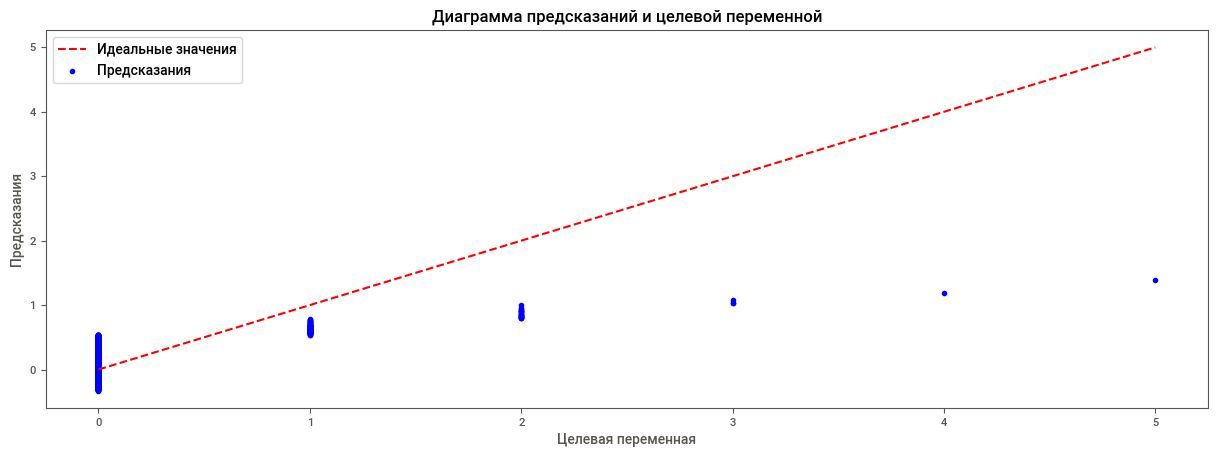

In [26]:
plot_predictions(y_pred)

В целом, значение Mean R2 score 0.429 говорит о том, что модель может быть полезной

In [27]:
# Получаем коэффициенты модели
coef = pipeline.named_steps['regressor'].coef_

# Создаем DataFrame с именами признаков и их важностью
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': coef})

# Сортируем признаки по их важности
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance.to_markdown(index=False))

Feature Importance:
| Feature        |   Importance |
|:---------------|-------------:|
| salary         |      552.818 |
| age            |      500.699 |
| gender         |      161.699 |
| family_members |     -109.587 |


Наиболее важные признаки для модели были: зарплата и возраст

## Отчет по исследованию

**1. Предобработка данных**
В ходе предобработки данных были выполнены следующие операции:

1. Удаление дубликатов в данных.
2. Перевод названий признаков на английский язык согласно рекомендациям PEP 8.
3. Изменение типов данных столбцов "Возраст" и "Зарплата" с float на integer. Столбец "Пол" был переведен в тип данных bool.

**2.  Анализ данных**
В результате анализа данных были получены следующие выводы:

1. Соотношение пола клиентов в выборке равномерное (1:1).
2. Возраст клиентов варьируется от 18 до 65 лет. Медианный возраст составляет 30 лет, а средний - 31 год.
3. Зарплата клиентов варьируется от 5.3 тыс.ед. до 79 тыс.ед. Медианное значение зарплаты составляет 40.2 тыс.ед., а среднее - 39.9 тыс.ед.
4. Количество членов семьи варьируется от 0 до 6 человек. В основном, это один человек (36% от общего числа), у 30% клиентов отсутствуют члены семьи, а у 21% - два человека. Доля клиентов с количеством членов семьи 5 и 6 составляет менее 1%.
5. Для 89% клиентов в выборке отсутствуют страховые выплаты за последние 5 лет. Одну выплату получили 8% клиентов, а две выплаты - 2%. Трое и более выплат получили менее 1% клиентов.
6. Количество страховых выплат коррелирует с возрастом клиентов, процент корреляции составляет 67%. Однако этот показатель не является критическим для построения модели машинного обучения. Остальные признаки имеют минимальную корреляцию между собой.

С возрастом, после 40 лет наблюдается постепенное и стабильное увеличение количества страховых выплат. Это говорит о том, что с возрастом растет вероятность страховых случаев, требующих выплаты.

С повышением возраста клиента и приближением его зарплаты к медианному значению в 40 тыс.ед., вероятность увеличения количества страховых выплат становится выше.

Можно предположить наличие связи между увеличением числа членов семьи и снижением обращений за страховыми выплатами. Однако, ввиду несбалансированности данных по этим показателям, нельзя сделать однозначные выводы. Для более точного определения связи необходимы дополнительные исследования и анализ.

**3. Умножение матриц**

    - Вопрос и ответ

Изменится ли качество линейной регрессии, если признаки умножить на обратимую матрицу? (С возможностью переобучения модели)

Ответ: Не изменится.

    - Обоснование

При умножении признаков $x$ на обратимую матрицу $A$, параметры линейной регрессии в исходной и преобразованной задаче связаны следующим образом:

$$
w' = A^{-1}w,
$$
$$
b' = b.
$$

Таким образом, параметры линейной регрессии в преобразованной задаче линейно зависят от параметров в исходной задаче, но с применением обратимой матрицы $A$ для преобразования признаков. Качество линейной регрессии не изменится при таком преобразовании. 

**4. Алгоритм преобразования**

1. Загрузить данные и разделить их на матрицу признаков $X$ и вектор целевой переменной $y$.
2. Оценить модель линейной регрессии на исходных данных, получив оптимальные веса $w$ и смещение $b$.
3. Сгенерировать обратимую матрицу $A$ размером $(m x m)$, где $m$ - количество признаков.
4. Умножить матрицу признаков $X$ на матрицу $A$, получив новую матрицу признаков $X' = XA$.
5. Обучить модель линейной регрессии на преобразованных признаках $X'$ и целевой переменной $y$, получив новые оптимальные веса $w'$ и смещение $b'$.
6. Оценить качество модели линейной регрессии на преобразованных данных, используя метрику R2.

Качество линейной регрессии не изменится после преобразования данных, так как параметры модели линейной регрессии связаны линейно и обратимая матрица $A$ не влияет на эти параметры. Таким образом, при умножении признаков на обратимую матрицу не происходит изменения качества модели линейной регрессии.

    - Заключение: Исходя из обоснования и алгоритма преобразования, можно утверждать, что умножение признаков на обратимую матрицу не изменит качество модели линейной регрессии.

**5. Проверка алгоритма**

    - Для проверки алгоритма были выполнены следующие шаги:

1. Разделение признаков и таргета.
2. Разделение данных на обучающую и тестовую выборки с помощью train_test_split.
3. Создание pipline, включающий StandardScaler() и модель LinearRegression.
4. Оптимизация гиперпараметров: с помощью RandomizedSearchCV подобраны лучшие гиперпараметры для модели.

   Лучшие параметры:
   - regressor__normalize = True,
   - regressor__n_jobs = -1
   - regressor__fit_intercept = True
   - regressor__copy_X = True
   
   
   - Лучший результат (R2): 0.423
   
   
5. Модель с лучшими гиперпараметрами была использована для анализа зашифрованных и не зашифрованных данных. Использовался цикл по разбиению данных на фолды с использованием StratifiedKFold, так как данный метод поддерживает стратификацию данных: 
   - Mean R2 score: 0.429
   - Наиболее важные признаки для модели были: зарплата и возраст
   - Mean R2 score 0.429 также указывает на то, что модель объясняет только около 42.9% вариации зависимой переменной. Возможные способы улучшения модели включают добавление новых признаков, использование более сложной модели и оптимизацию параметров этой модели. Такж можно помотреть, как изменится предсказниемодели, если вместо регрессии испоовать модель предсказния, предоставив таргет как категориальный класс.
     

**Результаты проверки алгоритма показали схожие значения метрик для запрограммированных алгоритмов с защитой данных и без защиты. Различия близки к нулю. Незначительное различие вызвано особенностями преобразования матриц и чисел с плавающей точкой. В случае домножения матрицы признаков на случайную обратимую матрицу можно обеспечить защиту данных. Можно также попробовать декодировать данные обратно.**